# STA 141B: Homework 2
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Edward

Last Name: Kang

Student ID: 912655433

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [177]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

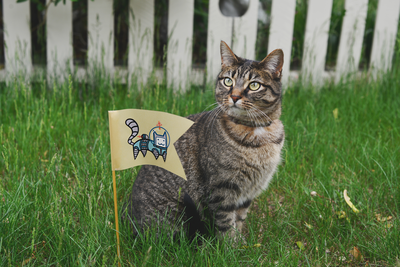

In [178]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [179]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [180]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [181]:
cat.shape

(267, 400, 3)

The cat array have 3 dimensions. It means the cat picture has 400x267 pixels, and each pixel is an array of 3 numbers.

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

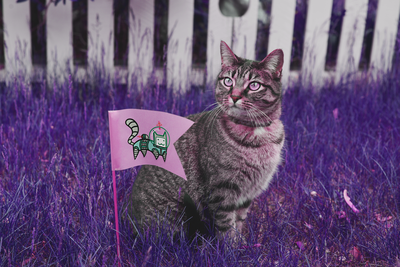

In [182]:
copy_cat = cat.copy()
copy_cat[:,:,[1,2]] = copy_cat[:,:,[2,1]]
img = as_image(copy_cat)
img.save('copy_cat.png')
copy_cat_img= Image.open("copy_cat.png")
copy_cat_img

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

If we do not use .copy(), we will loose the original channel values of the image.

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

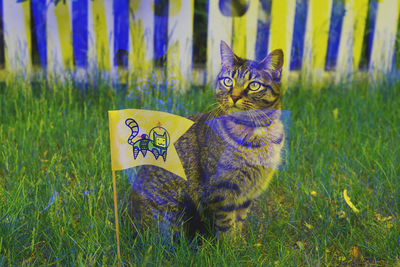

In [183]:
copy_cat2 = cat.copy()
copy_cat2[:,:,2] = np.fliplr(cat[:,:,2])
img = as_image(copy_cat2)
img.save('copy_cat2.png')
copy_cat2_img= Image.open("copy_cat2.png")
copy_cat2_img

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [184]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

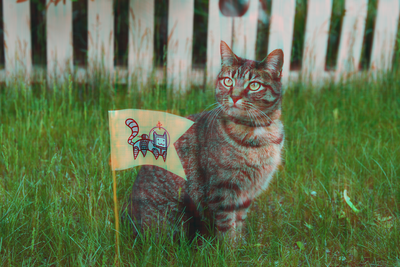

In [186]:
def SVD(x, q):
    """
    Args:
        x: The matrix of image. q: The number of elements keep in the matrix.
        
    Returns:
        xvq as a principal component matrix, and vqt as the basis matrix.
    """
    u, d, vt = np.linalg.svd(x)
    vq = vt.T[:,:q]
    vqt = vq.T
    xvq = x @ vq
    return xvq, vqt
    
def approx1(xvq, vqt):
    """
    Args:
        xvq: The principal component matrix. vqt: The basis matrix.
        
    Returns:
        The approximation for the original matrix.
    """
    return xvq @ vqt

copy_cat3 = cat.copy()
copy_cat3_red = copy_cat3[:,:,0]
xvq, vqt = decom(copy_cat3_red,10)
copy_cat3[:,:,0] = approx1(xvq, vqt)
img = as_image(copy_cat3)
img.save('copy_cat3_approx.png')
copy_cat3_approx_img= Image.open("copy_cat3_approx.png")
copy_cat3_approx_img

The samllest number of terms where the cat is still recongnizable as a cat is 0.

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [187]:
print(cat[:,:,0].nbytes)
print(xvq.nbytes + vqt.nbytes)
percent = (xvq.nbytes + vqt.nbytes)/(cat[:,:,0].nbytes)* 100
print(percent, "%")

106800
53360
49.9625468164794 %


The red color channel of the cat image uses 106800 bytes, and the compressed version when 10 terms are kept uses 53360 bytes. The compressed version when 10 terms are kept is 49.96% size of the original size.

## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [188]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [189]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [190]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[ 11.+0.j  -1.+0.j]
 [ -1.+0.j   0.+0.j]] 
x approx is:
 [[ 1.33333333  1.83333333  1.83333333]
 [ 1.66666667  2.16666667  2.16666667]]


As you can see, for a matrix this small eliminating even one term gives a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out in the bottom right corner of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

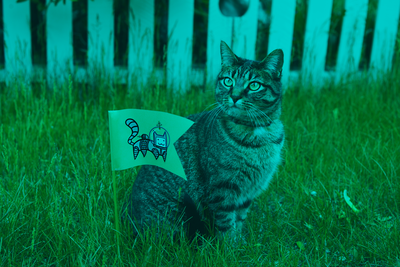

In [191]:
def FFT(x, r):
    """ 
    Args:
        x: The matrix of image. r: The square of r elements to zero out in the coefficients matrix.
        
    Returns:
        FFT coeffients as matrix and the dimensions of the original matrix.
    """
    x_coef = np.fft.rfft2(x)
    x_coef[-r:,-r:] = 0 
    dimension = x.shape
    return x_coef, dimension

def approx2(x_coef, dimension):
    """
    Args:
        x_coef: The FFT coeffients as matrix. dimension: The dimensions of the original matrix.
    
    Returns: approximation for the original matrix.
    """
    return np.fft.irfft2(x_coef, dimension)

copy_cat4 = cat.copy()
copy_cat4_red = copy_cat4[:,:,0]
x_coef, dimension = FFT(copy_cat4_red,0)
copy_cat4[:,:,0] = approx2(x_coef, dimension)
img = as_image(copy_cat4)
img.save('copy_cat4_approx.png')
copy_cat4_approx_img= Image.open("copy_cat4_approx.png")
copy_cat4_approx_img

The samllest number of terms is when all the elements in the complex coefficients martix are 0, and the cat is still recognizable as a cat.

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [192]:
print(x_coef.nbytes)

858672


SVD decomposition would work better for dimension reduction because principal component matrix XVq has the same number of rows of the original matrix, but the number of columns are reduced to the desired number. Therefore, the approximation matrix will have reduced dimension. FFT is better for file compression 